### Project 2020
###### Machine Learning and Statistics
###### Submission Date: January 8th, 2021

#### Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

# Predicting Wind Turbine Power from Wind Speed Values

### Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow
from tensorflow import keras as kr
from tensorflow.keras import layers

### Load Data

In [2]:
input_file = "powerproduction.csv"
df = pd.read_csv(input_file, header = 0)
original_headers = list(df.columns.values)
df = df._get_numeric_data()
numeric_headers = list(df.columns.values)

### Plotting the Data Set using MatplotLib.Plot

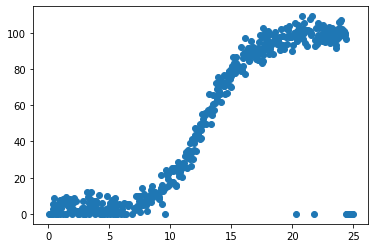

In [3]:
numpy_array = df.to_numpy()
x = numpy_array
# Plotting the data set.
plt.plot(x[:,0], x[:,1], 'o')

### Plotting the Data Set using seaborn.pairplot()

c:\users\suppo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


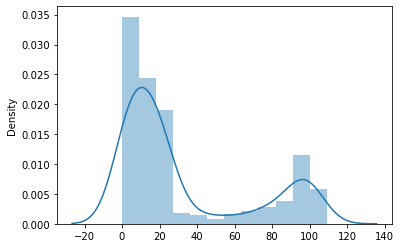

In [4]:
import seaborn as sns
sns.distplot(df)

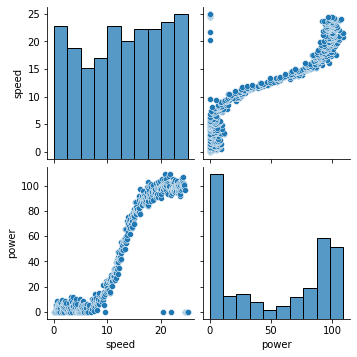

In [5]:
sns.pairplot(df)
#saving file for importing onto webpage
plt.savefig('pairplot.png')

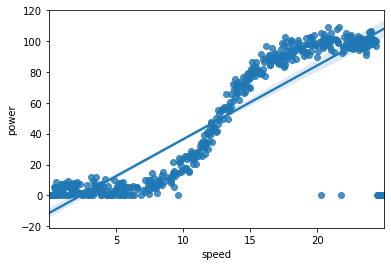

In [28]:
windspeed = df[["speed", "power"]].dropna()
sns.regplot(x="speed", y="power", data=df)

## skLearn Model
### Importing Linear Model functions

In [29]:
import sklearn.linear_model as lin

### Preprocessing Data

In [32]:
def f(x, p):
    return p[0] + x * p[1]

x = windspeed["speed"].to_numpy()
y = windspeed["power"].to_numpy()

x = x.reshape(-1, 1)

### Model

In [ ]:
model = lin.LinearRegression()
model.fit(x, y)
i = model.intercept_
c = model.coef_
r= model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [35]:
i

-11.498929411767072

In [36]:
c

array([4.79252047])

In [37]:
r

0.7277077554596567

In [38]:
p

[-11.498929411767072, 4.792520474329507]

In [39]:
f(16.0, p)

65.18139817750503

In [40]:
def predict(x):
       return f(x,p)

In [41]:
predict(16.0)

65.18139817750503

### Splitting the Data Set

In [64]:
from sklearn.model_selection import train_test_split
X_train20, X_test20 = train_test_split(x, test_size=0.20)

### Scaling the Data Set

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitting the 80% Training to the scaler.
scaler.fit(X_train20)

StandardScaler()

### Forming Train and Test Data Sets

In [68]:
f = lambda x: 3.0 * x + 1.0
X_train = scaler.transform(X_train20)
X_test = scaler.transform(X_test20)
Y_train = f(X_train)
Y_test = f(X_test)

### Model

In [47]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
13/13 [==============================] - 0s 1ms/step - loss: 5.0959
Epoch 2/300
13/13 [==============================] - 0s 1ms/step - loss: 5.0766
Epoch 3/300
13/13 [==============================] - 0s 1ms/step - loss: 5.0847
Epoch 4/300
13/13 [==============================] - 0s 1ms/step - loss: 4.7985
Epoch 5/300
13/13 [==============================] - 0s 1ms/step - loss: 4.6184
Epoch 6/300
13/13 [==============================] - 0s 1ms/step - loss: 4.7518
Epoch 7/300
13/13 [==============================] - 0s 1ms/step - loss: 4.4634
Epoch 8/300
13/13 [==============================] - 0s 1ms/step - loss: 4.6605
Epoch 9/300
13/13 [==============================] - 0s 1000us/step - loss: 4.5716
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 4.3131
Epoch 11/300
13/13 [==============================] - 0s 1ms/step - loss: 4.1918
Epoch 12/300
13/13 [==============================] - 0s 1ms/step - loss: 4.3890
Epoch 13/300
13/13 [==============

13/13 [==============================] - 0s 1ms/step - loss: 0.8078
Epoch 102/300
13/13 [==============================] - 0s 1000us/step - loss: 0.8525
Epoch 103/300
13/13 [==============================] - 0s 1ms/step - loss: 0.8537
Epoch 104/300
13/13 [==============================] - 0s 1ms/step - loss: 0.7977
Epoch 105/300
13/13 [==============================] - 0s 1ms/step - loss: 0.8061
Epoch 106/300
13/13 [==============================] - 0s 1ms/step - loss: 0.8196
Epoch 107/300
13/13 [==============================] - 0s 1ms/step - loss: 0.7531
Epoch 108/300
13/13 [==============================] - 0s 1ms/step - loss: 0.7430
Epoch 109/300
13/13 [==============================] - 0s 1ms/step - loss: 0.7116
Epoch 110/300
13/13 [==============================] - 0s 1ms/step - loss: 0.6987
Epoch 111/300
13/13 [==============================] - 0s 916us/step - loss: 0.7258
Epoch 112/300
13/13 [==============================] - 0s 1ms/step - loss: 0.6755
Epoch 113/300
13/13 [====

13/13 [==============================] - 0s 1ms/step - loss: 0.0693
Epoch 201/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0687
Epoch 202/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0656
Epoch 203/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0620
Epoch 204/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0553
Epoch 205/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 206/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0547
Epoch 207/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0533
Epoch 208/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0543
Epoch 209/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 210/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0479
Epoch 211/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0478
Epoch 212/300
13/13 [=========

13/13 [==============================] - 0s 1ms/step - loss: 6.8365e-04
Epoch 300/300
13/13 [==============================] - 0s 917us/step - loss: 5.8776e-04


### Testing the Train and Test Data Sets for Mean Squared Error

In [70]:
from sklearn.metrics import mean_squared_error
pred_train_linreg = model(X_train)
np.sqrt(mean_squared_error(pred_train_linreg,Y_train))

0.02430661365472375

In [71]:
pred_test_linreg = model(X_test)
np.sqrt(mean_squared_error(pred_test_linreg,Y_test))

0.023280514497925793

In [72]:
pred_ytrain_linreg = model(Y_train)
np.sqrt(mean_squared_error(pred_ytrain_linreg,X_train))

8.831994769214356

In [73]:
pred_ytest_linreg = model(Y_test)
np.sqrt(mean_squared_error(pred_ytest_linreg,X_test))

8.930433718280955

### Plotting the Train and Test Data Sets

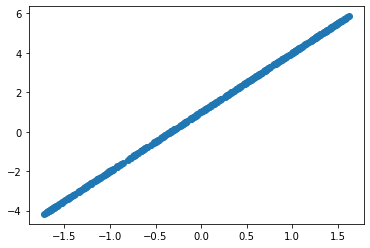

In [53]:
plt.scatter(X_train, Y_train)

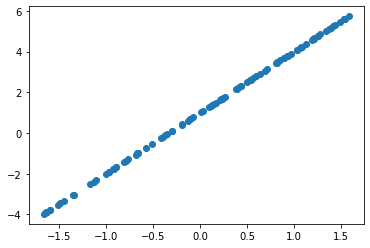

In [85]:
plt.scatter(X_test, Y_test)

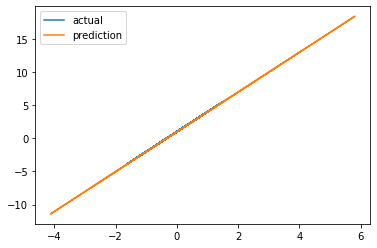

In [87]:
plt.plot(X_test, Y_test, label='actual')
plt.plot(model.predict(X_train), model.predict(Y_train), label='prediction')
plt.legend();

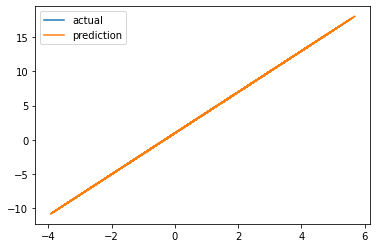

In [88]:
plt.plot(X_train, Y_train, label='actual')
plt.plot(model.predict(X_test), model.predict(Y_test), label='prediction')
plt.legend();

### Model Predicting using 4 Sample Points

In [61]:
model.predict([5.0,10.0,15.0,20.0])

array([[15.878896],
       [30.756504],
       [45.634113],
       [60.51172 ]], dtype=float32)

In [105]:
np.array([[f(i)] for i in [5.0, 10.0, 15.0, 20.0]])

array([[16.],
       [31.],
       [46.],
       [61.]])

### Evaluating the Model on Test and Training Sets

In [103]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 1ms/step - loss: 5.4198e-04


0.0005419824155978858

In [104]:
model.evaluate(X_train, Y_train)

13/13 [==============================] - 0s 1ms/step - loss: 5.9081e-04


0.0005908113089390099

### References
Course content and resources.
1. GMIT (2018) “Quality assurance framework,” Accessed online at: https://www.gmit.ie/general/quality-assurance-framework.
2. I. McLoughlin (2020) “Using git for assessments,”. Accessed online at: https://github.com/ianmcloughlin/using-git-for-assessments/.
3. Sk Learn (2020) Supervised Learning Documentation. Accessed online at: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
4. w3schools (2020) Tutorials. Access online at: https://www.w3schools.com/
5. StackOverflow (2020) Various Stack Overflow Queries. Accessed online at: https://stackoverflow.com/
6. DataCamp (2020) Turning Machine Learning Models into APIs in Python. Accessed online at: https://www.datacamp.com/community/tutorials/machine-learning-models-api-python#comments
7. Keras (2020) Developer guides. Accessed online at: https://keras.io/guides/
8. Brownlee, J. (2016) Save and Load Machine Learning Models in Python with scikit-learn. Accessed online at: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
9. Brownlee, J (2017) How to Train a Final Machine Learning Model. Accessed online at: https://machinelearningmastery.com/train-final-machine-learning-model/
10. Brownlee, J (2018) How to Make Predictions with scikit-learn. Accessed online at: https://machinelearningmastery.com/make-predictions-scikit-learn/
11. Docker Docs (2020) Docker Build Documentation. Accessed online at: https://docs.docker.com/engine/reference/commandline/build/